In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from datetime import datetime

In [4]:
print(datetime.now())
start = datetime.now()

2022-01-22 21:42:25.355121


In [5]:
start = datetime.now()
mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist = fetch_mldata('MNIST original')
end = datetime.now()

In [6]:
diff = end - start
print(diff.days,'days + ', diff.seconds, 'giây')

0 days +  52 giây


In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
mnist.data.shape

(70000, 784)

In [9]:
mnist.target.shape

(70000,)

In [10]:
mnist.target[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
img_train, img_test, label_train, label_test = train_test_split(mnist.data, mnist.target,
                                                               test_size=1/7.0, random_state=0)

In [12]:
img_train.shape

(60000, 784)

In [13]:
img_test.shape

(10000, 784)

In [14]:
img_train[:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
28926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# scale dữ liệu
scaler = StandardScaler()
scaler.fit(img_train)

StandardScaler()

In [16]:
img_train_scale = scaler.transform(img_train)
img_test_scale = scaler.transform(img_test)

In [31]:
# build model với dữ liệu gốc --> nhận xét tốc độ
# dùng SVM classification
from sklearn.svm import SVC

In [32]:
model_o = SVC(gamma = 0.001, C=100)

In [33]:
start = datetime.now()
model_o.fit(img_train_scale, label_train)
end = datetime.now()
diff = end - start
print(diff.days,'days + ', diff.seconds, 'giây')

0 days +  353 giây


In [34]:
label_pred_o = model_o.predict(img_test_scale)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(label_test, label_pred_o) * 100, '%')

Accuracy: 97.31 %


In [36]:
# nhận xét: thời gian huấn luyện khá lâu (353 giây) 
# xem xét sử dụng PCA để tăng tốc độ huấn luyện

#### áp dụng PCA để tăng tốc độ

In [18]:
# áp dụng PCA để tăng tốc độ
pca = PCA(n_components = 0.95) # giữ lại 95% thông tin của bộ dữ liệu

In [19]:
pca.fit(img_train_scale)

PCA(n_components=0.95)

In [20]:
pca.n_components_

327

In [21]:
# sau khi giảm còn lại 327 features với 95% thông tin của bộ dữ liệu

In [22]:
# apply kết quả vào cho dữ liệu train và test
img_train_pca = pca.transform(img_train_scale)
img_test_pca = pca.transform(img_test_scale)

### build model với dữ liệu đã giảm chiều

In [23]:
# dùng SVM classification
from sklearn.svm import SVC

In [24]:
model = SVC(gamma = 0.001, C=100)

In [25]:
start = datetime.now()
model.fit(img_train_pca, label_train)
end = datetime.now()
diff = end - start
print(diff.days,'days + ', diff.seconds, 'giây')

0 days +  164 giây


In [26]:
label_pred = model.predict(img_test_pca)

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(label_test, label_pred) * 100, '%')

Accuracy: 97.38 %


In [28]:
print('r2_score:', model.score(img_test_pca, label_test) * 100, '%')

r2_score: 97.38 %


In [29]:
import matplotlib.pyplot as plt

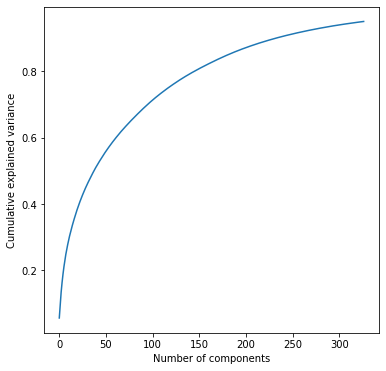

In [30]:
# trực quan kết quả
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
# nhận xét: sau khi áp dụng PCA, thời gian huấn luyện nhanh hơn khá nhiều với 164 giây
# trong khi vẫn đảm bảo 95% thông tin của bộ dữ liệu